In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

In [3]:
df=pd.read_csv("AIA_Churn_Modelling_Case_Study.csv")
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

# Data Engineering

# To understand the type of customers

In [5]:
df['Churn'].replace({'Yes':'1','No':'0'},inplace=True)
df['Churn']=df['Churn'].astype(int)

   gender  Churn
0  Female    939
1    Male    930


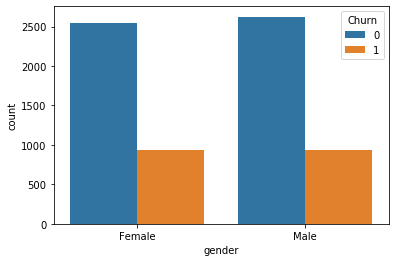

In [6]:
a=df[['gender','Churn']].groupby(['gender'],as_index=False).sum()
print(a)
sns.countplot(x='gender',data=df,hue='Churn')

from this it is clear that, equal no of male and female are churned

   SeniorCitizen     Churn
0              0  0.236062
1              1  0.416813


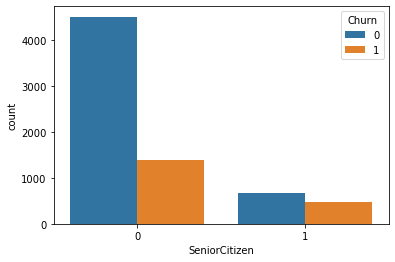

In [7]:
a=df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen'],as_index=False).mean()
print(a)
sns.countplot(x='SeniorCitizen',data=df,hue='Churn')

In [8]:
a=df.groupby(['gender','SeniorCitizen','Partner','Dependents']).mean().sort_values(by='Churn',ascending=False)
a.Churn

gender  SeniorCitizen  Partner  Dependents
Female  1              No       No            0.498423
Male    1              No       No            0.483607
                       Yes      No            0.373665
Female  1              Yes      No            0.349282
                       No       Yes           0.333333
        0              No       No            0.320628
Male    0              No       No            0.302679
        1              Yes      Yes           0.272727
        0              Yes      No            0.225750
Female  0              No       Yes           0.225352
        1              Yes      Yes           0.205128
Male    0              No       Yes           0.203791
        1              No       Yes           0.200000
Female  0              Yes      No            0.191275
                                Yes           0.146919
Male    0              Yes      Yes           0.127737
Name: Churn, dtype: float64

# To understand the contracts and payments 

In [9]:
df[['Contract','Churn']].groupby(['Contract']).mean()

Churn
Contract                
Month-to-month  0.427097
One year        0.112695
Two year        0.028319

In [10]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')

In [11]:
a=df.groupby(['PaymentMethod','PaperlessBilling']).mean().sort_values(by='Churn',ascending=False)
a[['MonthlyCharges','Churn']]

MonthlyCharges     Churn
PaymentMethod             PaperlessBilling                          
Electronic check          Yes                    79.519460  0.497704
                          No                     67.130177  0.327448
Mailed check              Yes                    53.373399  0.272866
Bank transfer (automatic) Yes                    75.563187  0.208754
Credit card (automatic)   Yes                    74.750737  0.190476
Mailed check              No                     37.428190  0.134937
Bank transfer (automatic) No                     55.771286  0.110260
Credit card (automatic)   No                     55.158906  0.100000

# To know about the services choosed by the customers

In [12]:
a=df.groupby(['PhoneService','InternetService']).mean()
a

SeniorCitizen     tenure  MonthlyCharges  \
PhoneService InternetService                                             
No           DSL                   0.152493  31.737537       42.028592   
Yes          DSL                   0.089132  33.246694       64.405894   
             Fiber optic           0.268411  32.917959       91.500129   
             No                    0.034076  30.547182       21.079194   

                              TotalCharges     Churn  
PhoneService InternetService                          
No           DSL               1500.433750  0.249267  
Yes          DSL               2362.393952  0.166187  
             Fiber optic       3205.304570  0.418928  
             No                 665.220329  0.074050

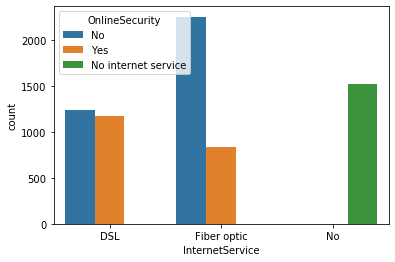

In [13]:
sns.countplot(x='InternetService',data=df,hue='OnlineSecurity')

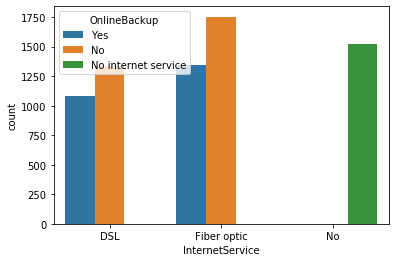

In [14]:
sns.countplot(x='InternetService',data=df,hue='OnlineBackup')

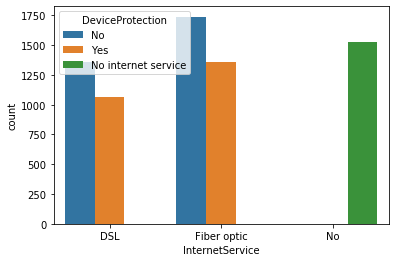

In [15]:
sns.countplot(x='InternetService',data=df,hue='DeviceProtection')

Text(0.5, 1.0, 'StreamingMovies v/s InternetService')

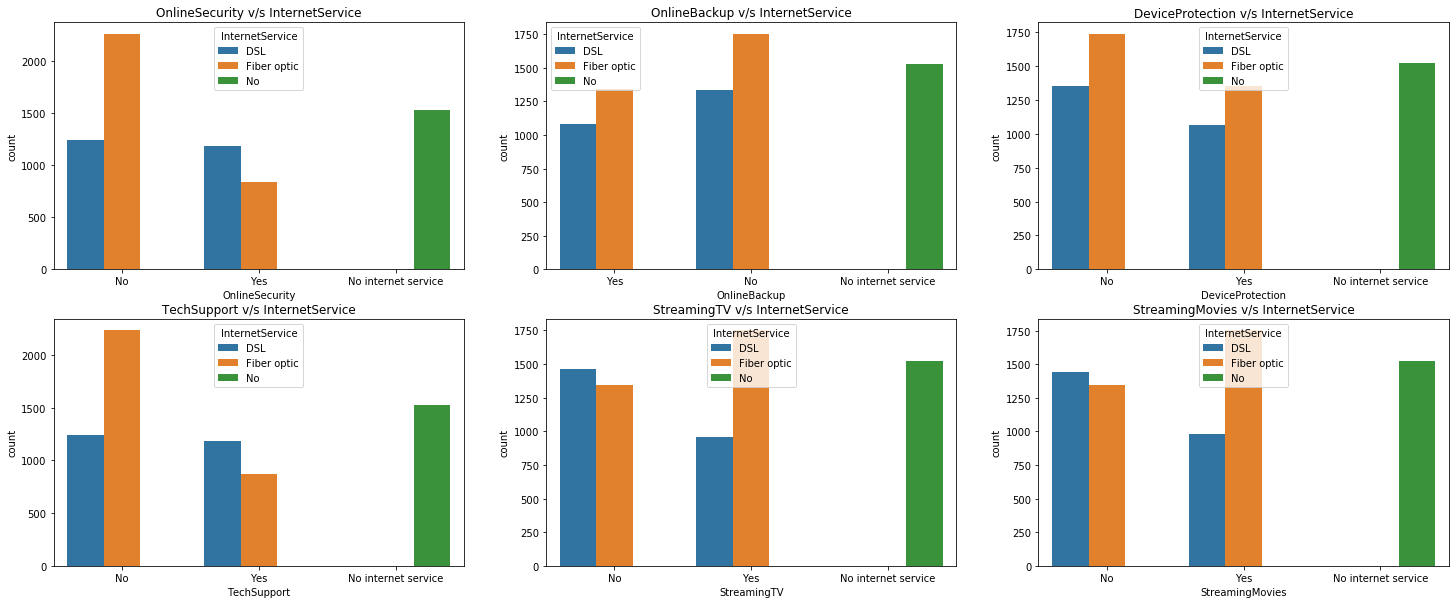

In [16]:

fig,axes=plt.subplots(2,3,figsize=(25, 10))

sns.countplot(x='OnlineSecurity',hue='InternetService',data=df,ax=axes[0,0])
sns.countplot(x='OnlineBackup',data=df,hue='InternetService',ax=axes[0,1])
sns.countplot(x='DeviceProtection',data=df,hue='InternetService',ax=axes[0,2])

axes[0,0].set_title('OnlineSecurity v/s InternetService')
axes[0,1].set_title('OnlineBackup v/s InternetService')
axes[0,2].set_title('DeviceProtection v/s InternetService')

sns.countplot(x='TechSupport',data=df,hue='InternetService',ax=axes[1,0])
sns.countplot(x='StreamingTV',data=df,hue='InternetService',ax=axes[1,1])
sns.countplot(x='StreamingMovies',data=df,hue='InternetService',ax=axes[1,2])

axes[1,0].set_title('TechSupport v/s InternetService')
axes[1,1].set_title('StreamingTV v/s InternetService')
axes[1,2].set_title('StreamingMovies v/s InternetService')



# Pre-Modelling

In [20]:
# converting the non-catagorical value to catagorical

le=preprocessing.LabelEncoder()

df['gender']=le.fit_transform(df['gender'])
df['Partner']=le.fit_transform(df['Partner'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['PhoneService']=le.fit_transform(df['PhoneService'])
df['MultipleLines']=le.fit_transform(df['MultipleLines'])

df['InternetService']=le.fit_transform(df['InternetService'])
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])

df['Contract']=le.fit_transform(df['Contract'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int32
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int32
Dependents          7043 non-null int32
tenure              7043 non-null int64
PhoneService        7043 non-null int32
MultipleLines       7043 non-null int32
InternetService     7043 non-null int32
OnlineSecurity      7043 non-null int32
OnlineBackup        7043 non-null int32
DeviceProtection    7043 non-null int32
TechSupport         7043 non-null int32
StreamingTV         7043 non-null int32
StreamingMovies     7043 non-null int32
Contract            7043 non-null int32
PaperlessBilling    7043 non-null int32
PaymentMethod       7043 non-null int32
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int32
dtypes: float64(2), int32(16), int64(2), object(

In [22]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [23]:
df.dropna(axis=0,inplace=True)

In [35]:
df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1  

[5 rows x 21 columns]

In [26]:
df.shape

(7032, 21)

# Model Development

In [36]:
corr= df.corr().round(2)
corr.style.background_gradient(cmap='coolwarm')

In [38]:
corr['Churn'].sort_values()

Contract           -0.40
tenure             -0.35
OnlineSecurity     -0.29
TechSupport        -0.28
OnlineBackup       -0.20
TotalCharges       -0.20
DeviceProtection   -0.18
Dependents         -0.16
Partner            -0.15
InternetService    -0.05
StreamingMovies    -0.04
StreamingTV        -0.04
gender             -0.01
PhoneService        0.01
MultipleLines       0.04
PaymentMethod       0.11
SeniorCitizen       0.15
PaperlessBilling    0.19
MonthlyCharges      0.19
Churn               1.00
Name: Churn, dtype: float64

In [134]:
x=df[['Contract','tenure','OnlineSecurity','TechSupport','OnlineBackup','TotalCharges',
     'DeviceProtection','Dependents','Partner','InternetService','StreamingMovies','StreamingTV',
     'gender','PhoneService','MultipleLines','PaymentMethod','SeniorCitizen','PaperlessBilling', 'MonthlyCharges']]
y=df['Churn']



In [133]:
# to select the feature importance

from sklearn.ensemble import ExtraTreesRegressor

feature=ExtraTreesRegressor()
feature.fit(x,y)


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

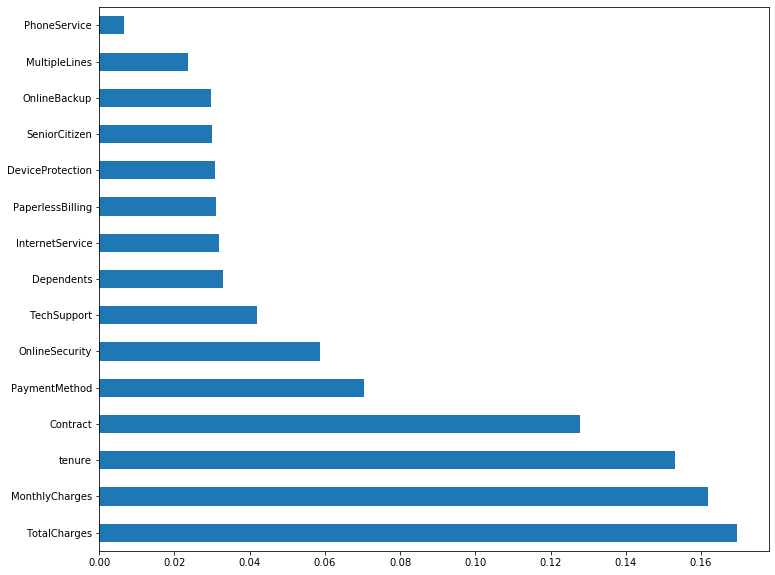

In [101]:
plt.figure(figsize=(12,10))
feat_importance=pd.Series(feature.feature_importances_,index=x.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

In [102]:
# fitting the model using RandomForestTree

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train.shape,x_test.shape)


from sklearn.ensemble import RandomForestClassifier

Rf=RandomForestClassifier(n_estimators=1000,min_samples_split=8,min_samples_leaf=4)
Rf.fit(x_train, y_train)

(4922, 15) (2110, 15)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
y_pred=Rf.predict(x_test)
Rf.score(x_test,y_test)

0.7966824644549763

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("RMSE:"+ str(np.sqrt(mean_squared_error(y_test,y_pred))))
print("MAE:", mean_absolute_error(y_test,y_pred))
print("R2:", r2_score(y_test,y_pred))

RMSE:0.450907457850304
MAE: 0.2033175355450237
R2: -0.048857217345963155


In [185]:
sns.distplot(y_pred)

Exception: Data must be 1-dimensional

In [161]:
x=df[['Contract','tenure','OnlineSecurity','TechSupport','OnlineBackup','TotalCharges',
     'InternetService','PhoneService','PaymentMethod','SeniorCitizen','PaperlessBilling', 'MonthlyCharges']]
y=df['Churn']



In [193]:
from sklearn.model_selection import StratifiedShuffleSplit

X=x.values
Y=y.values

sss=StratifiedShuffleSplit(n_splits=8,test_size=0.3,random_state=42)

for train_index, test_index in sss.split(X,Y):
    x_train,x_test=X[train_index],X[test_index]
    y_train,y_test=Y[train_index],Y[test_index]
    
from sklearn.ensemble import RandomForestClassifier

Rf=RandomForestClassifier(n_estimators=1000,max_depth=50,min_samples_split=4,min_samples_leaf=4)
Rf.fit(x_train, y_train)

y_pred=Rf.predict(x_test)
Rf.score(x_test,y_test)

print("RMSE:"+ str(np.sqrt(mean_squared_error(y_test,y_pred))))
print("MAE:", mean_absolute_error(y_test,y_pred))
print("R2:", r2_score(y_test,y_pred))

RMSE:0.43919357379254026
MAE: 0.1928909952606635
R2: 0.011759642527120584


In [174]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train.shape,x_test.shape)


from sklearn.ensemble import RandomForestClassifier

Rf=RandomForestClassifier(n_estimators=5,min_samples_split=8,min_samples_leaf=4)
Rf.fit(x_train, y_train)

y_pred=Rf.predict(x_test)
Rf.score(x_test,y_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("RMSE:"+ str(np.sqrt(mean_squared_error(y_test,y_pred))))
print("MAE:", mean_absolute_error(y_test,y_pred))
print("R2:", r2_score(y_test,y_pred))

(4922, 12) (2110, 12)
RMSE:0.4587227270196673
MAE: 0.2104265402843602
R2: -0.08553054662379411
